There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests. 

# Normality Assumption 

A large fraction of the field of statistics is concerned with data that assumes that it was drawn from a Gaussian dustribution.

If methods are used that assume a Gaussian distribution, and your data was frawn from a different distribution, the findings may be misleading or plain wrong.

There are number of techniques that you can check if your data sample is Gaussian or sufficiently Gaussian-like to use the standard techniques, or sufficiently non-Gaussian to instead use non-parametric statistical methods.

This is a key decision point when it comes to choosing statistical methods for your data sample. We can summarize this decision as follows:

In [ ]:
If Data Is Gaussian:
    Use Parametric Statistical Methods
Else:
    Use Nonparametric Statistical Methods

There is also some middle ground where we can assume that the data is Gaussian-enough to use parametric methods or that we can use data preparation techniques to transform the data to be suffucuently Gaussian to use the parametric methods.

There are three main areas where yoiu may need to make this evaluation of a data sample in a machine learning project; they are:
- Input data to the model in the case of fitting models. 
- Model evaluation results in the case of model selection. 
- Residual errores from model predictions in the case or regression.

In this tutorial, we will look at two classes of techniques for checking whether a sample of data is Gaussian:
- **Graphical Methods**. These are methods for plotting the data and qualitatively evaluation whether the data looks Gaussian.
- **Statistical Tests**. These are methods that calculate statistics on the data and quantify how likely it is that the data was drawn from a Gaussian distribution.

Methods of this type are often called normality tests.

# Test Dataset

Before we start looking at normality tests, let's first develop a test dataset that we can use throughout this tutorial. 

We will generate a small sample of random numbers drawn from a Gaussian distribution.

The choice of Gaussian random numbers for the test dataset means that we do expect each test to correctly identify the distribution, nevertheless, the small-ish sample size may introduce some noise into the results.

We will use the randn() NumPy function to generate random Gaussian numbers with a mean of 0 and a standard deviation of 1, so-called standard, normal variables. We will then shift them to have a mean of 50 and a standard deviation of 5.

The complete example is listed below.

In [1]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


Running the example generates the sample and prints the mean and standard deviation of the sample.

We can see that the mean and standard deviation are reasonable but rough estimations of the true underlying population mean and standard deviation, given the small-ish sample size.

# Visual Normality Checks 

We can create plots of the data to check whether it is Gaussian.

These checks are qualitative, so less accurate than the statistical methods we will calculate in the next section. Nevertheless, they are fast and like the statistical tests, must still be interpreted before you can make a call about your data sample.

In this section, we will look at two common methods for visually inspecting a dataset to check if it was drawn from a Gaussian distribution.

## Histogram Plot 

A simple and commonly used plot to quickly check the distribution of data is the histogram. 

In the histogram, the data is divided into a pre-specified number of groups called bins. The data is then sorted into each bin and the count of the number of observations in each bin is retained.

The plot shows the bins across the x-axis maintaining their ordinal relationship, and the count in each bin on the y-axis. 

A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.

A histogram can be created using the hist() matplotlib function. By default, the number of bins is automatically estimated from the data sample.

A complete example demonstrating the histogram plot on the test problem is listed below.

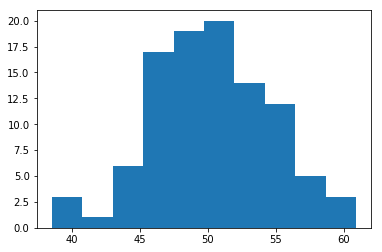

In [2]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data)
pyplot.show()

Running the example creates a histogram plot showing the number of observations in each bin.

We can see a Gaussian-like shape to the data, that although is not strongly the familiar bell-shape, is a rough approximation.

## Quantile-Quantile Plot

Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short. 

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distributio. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

We can develop a QQ plot in Python using the qqplot() statsmodels function. The function takes the data sample and by default assumes we are comparing it to a Gaussian distribution. We can draw the standardized line by setting the *line* argument to *s*.

A complete example of plotting the test dataset as a QQ plot is provided below.

In [ ]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
pyplot.show()

Running the example creates the QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

There are few small deviations, especially at the bottom of the plot, which is to be expected given the small data sample.

# Statistical Normality Tests

There are many statistical tests that we can use to quantify whether a sample of data looks as though it was frawn from Gaussian distribution.

Each test makes different assumptions and considers different aspects of the data.

We will look at 3 commonly used tests in this section that you can apply to your own data samples.

## Interpretation of a Test 

Before you can apply the statistical tests, you must know how to interpret the results.

Each test will return at least two things:
- **Statistic**: A queantity calculated by the test that can be interpreted in the context of the test vua comparing it to critical values from the distribution of the test statistic.
- **p-value**: Used to interpret the test in this case whether the sample was drawn from a Gaussian distribution.

Each test calculates a test-specific statistic. This statistic can aid in the interpretation od the result, although ut may require a deeper profiviency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.

The tests assume that that the sample was drawn form a Gaussian distribution, Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, pypically (or 0.05), that is used to interpret the p-value. 

In the SciPy implementation of these tests, you can interpret the p value as follows.
- **p<=alpha**:reject H0, not normal.
- **p>alpha**: fail to reject H0, normal.

This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely frawn from a Gaussian distribution.

A result above 5% does not mean that null pypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

## Shapiro-Wilk Test

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was frawn from a Gaussian disbution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() Scipy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

The complete example of performing the Shapiro-Wilk test on the dataset is listed below.

In [3]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


Running the example first calculates the test on the data sample, then prints the statistic and calculated p-value.

The p-value is interested and finds that the data is likely drawn from a Gaussian distribution.

## D'Agostino's K^2 Test 

The D'Agostino's K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D'Agositino.

- **Skew** is a quantifivation of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
- **Kurtosis** quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

The D'Agostino's K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value. 

The complete example of the D'Agostino's K^2 test on the dataset is listed below.

In [4]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


Running the example calculates the statistic and prints the statistic and p-value.

The p-value is interpreted against an alpha of 5% and finds that the test dataset does not significantly deviate from normal.

## Anderson-Darling Test 

Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling. 

It can be used to check whether a data sample is normal The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It tales as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist='norm').

The complete example of calculating the Anderson-Darling test on the sample problem is listed below.

In [5]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


Running the example calculates the statistic on the test data set and prints the vritical values.

Critical values in a statistical test are range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels.